In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score,confusion_matrix, classification_report


In [4]:
stroke_df = pd.read_csv(Path("./Data/healthcare-dataset-stroke-data.csv"))

Step 1: Data Understanding, Cleaning and Pre-processing


In [5]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
stroke_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
unknown_count = len(stroke_df[stroke_df['smoking_status'] == 'Unknown'])


In [10]:
unknown_count

1544

<Axes: >

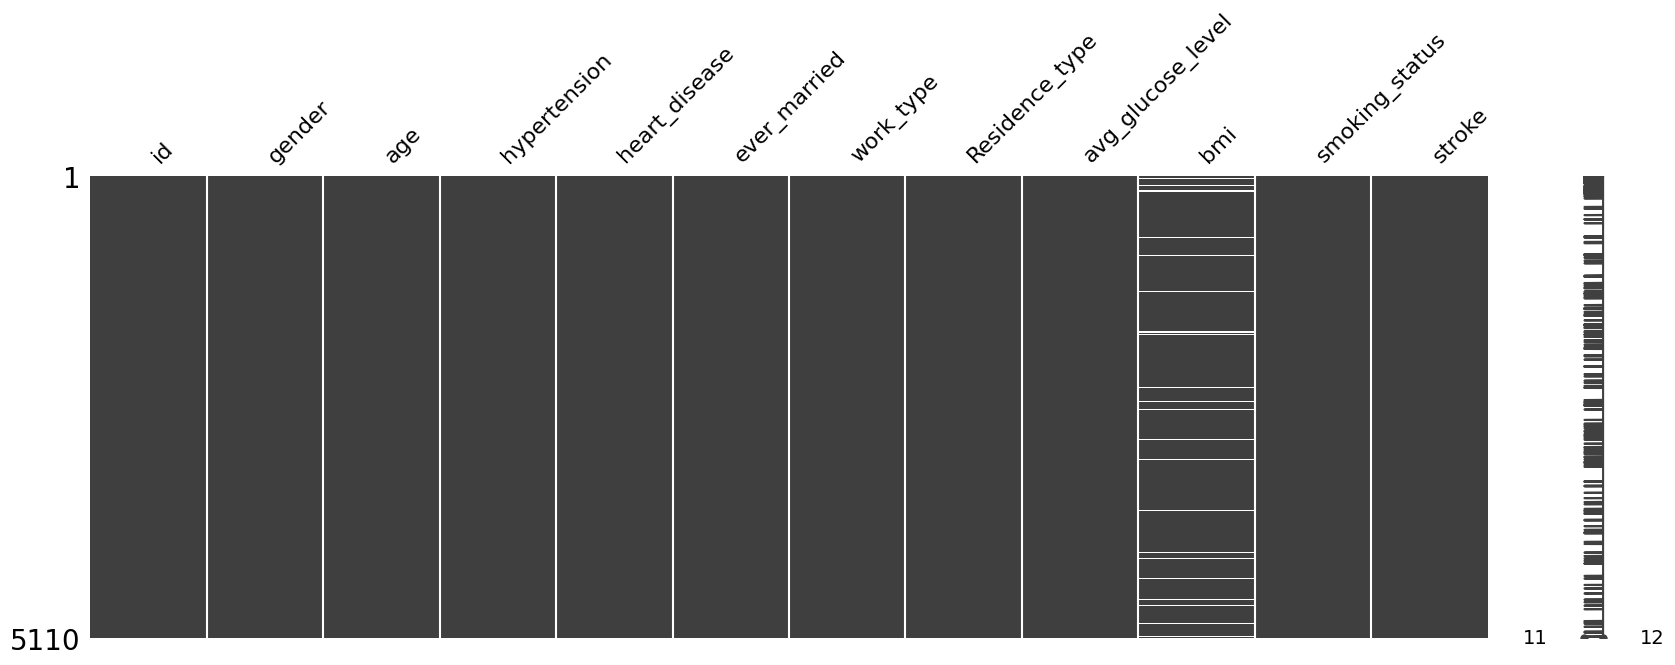

In [62]:
mno.matrix(stroke_df, figsize = (20, 6))

[Text(0.5, 1.0, 'Data Distribution w.r.t. Stroke Outcome: Smoking Status')]

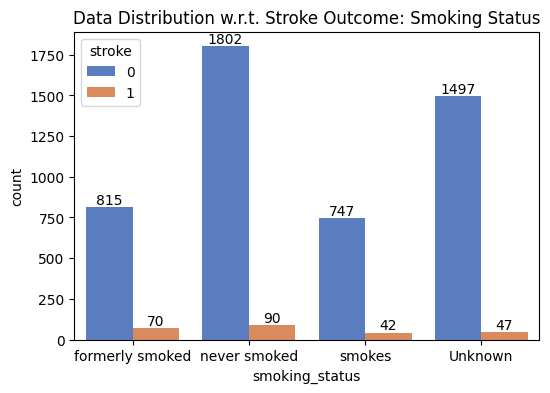

In [11]:
plt.figure(figsize=(6,4))
smoking_visual = sns.countplot(x = 'smoking_status', hue ='stroke', data = stroke_df, palette='muted')
for container in smoking_visual.containers:
    smoking_visual.bar_label(container)
smoking_visual.set(title = "Data Distribution w.r.t. Stroke Outcome: Smoking Status")

In [12]:
Target = 'stroke'
stroke_df[Target].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

C:\Users\Sijal\AppData\Local\Temp\ipykernel_17352\3050293321.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt.pie(pd.value_counts(stroke_df['stroke']),


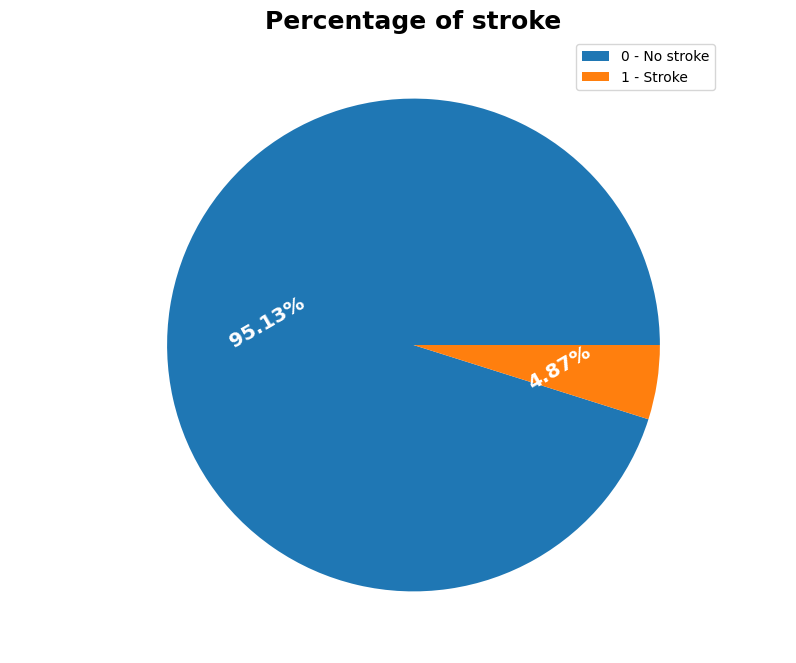

In [13]:
plt.figure(figsize = (8, 8))
plt.pie(pd.value_counts(stroke_df['stroke']), 
        labels = ["0 - No stroke","1 - Stroke"],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : 30,
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of stroke', fontsize = 18, fontweight = 'bold')
plt.show()

In [14]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
stroke_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [16]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)

In [17]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Column Exploration using PySpark

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, desc, col
from pyspark.sql.functions import max
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import when
from pyspark.sql.functions import col, upper, when

In [19]:
spark = SparkSession.builder.appName("Stroke_prediction").getOrCreate()

In [20]:
stroke_pred_df = spark.read.csv("./Data/healthcare-dataset-stroke-data.csv", header=True, inferSchema=False)

In [21]:
stroke_pred_df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [22]:
stroke_pred_df.show(stroke_pred_df.count())

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|  67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|  61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|  80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|  49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|  79|           1|            0|         

In [23]:
gender_stroke_counts = stroke_pred_df.groupBy('gender', 'stroke').count()

In [24]:
gender_stroke_counts.show()
male_stroke_count = gender_stroke_counts.filter((col('gender') == 'Male') & (col('stroke') == 1)).select('count').collect()[0][0]
female_stroke_count = gender_stroke_counts.filter((col('gender') == 'Female') & (col('stroke') == 1)).select('count').collect()[0][0]
male_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Male') & (col('stroke') == 0)).select('count').collect()[0][0]
female_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Female') & (col('stroke') == 0)).select('count').collect()[0][0]
other_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Other') & (col('stroke') == 0)).select('count').collect()[0][0]

print("Male with stroke count:", male_stroke_count)
print("Female with stroke count:", female_stroke_count)
#print("Other with stroke count:", other_stroke_count)

print("Male without stroke count:", male_no_stroke_count)
print("Female without stroke count:", female_no_stroke_count)
print("Other without stroke count:", other_no_stroke_count)


+------+------+-----+
|gender|stroke|count|
+------+------+-----+
|  Male|     1|  108|
|Female|     0| 2853|
| Other|     0|    1|
|  Male|     0| 2007|
|Female|     1|  141|
+------+------+-----+

Male with stroke count: 108
Female with stroke count: 141
Male without stroke count: 2007
Female without stroke count: 2853
Other without stroke count: 1


In [25]:
male_count = gender_stroke_counts.filter((col('gender') == 'Male') | (col('gender') == 'male')).select('count').collect()[0][0]
female_count = gender_stroke_counts.filter((col('gender') == 'Female') | (col('gender') == 'female')).select('count').collect()[0][0]
other_count = gender_stroke_counts.filter((col('gender') == 'Other') | (col('gender') == 'other')).select('count').collect()[0][0]
print("Total Male count:", male_count)
print("Total Female count:", female_count)
print("Other count:", other_count)

Total Male count: 108
Total Female count: 2853
Other count: 1


In [26]:
hypertension_stroke_counts = stroke_pred_df.groupBy('hypertension', 'stroke').count()

In [27]:
hypertension_stroke_counts.show()
whypertension_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 1) & (col('stroke') == 1)).select('count').collect()[0][0]
wohypertension_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 0) & (col('stroke') == 1)).select('count').collect()[0][0]
whypertension_no_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 1) & (col('stroke') == 0)).select('count').collect()[0][0]
wohypertension_no_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 0) & (col('stroke') == 0)).select('count').collect()[0][0]

print("With Hypertension having stroke:", whypertension_stroke_count)
print("Without Hypertension having stroke:", wohypertension_stroke_count)
print("With Hypertension having no stroke:", whypertension_no_stroke_count)
print("Without Hypertension having no stroke:", wohypertension_no_stroke_count)


+------------+------+-----+
|hypertension|stroke|count|
+------------+------+-----+
|           0|     1|  183|
|           1|     1|   66|
|           0|     0| 4429|
|           1|     0|  432|
+------------+------+-----+

With Hypertension having stroke: 66
Without Hypertension having stroke: 183
With Hypertension having no stroke: 432
Without Hypertension having no stroke: 4429


In [28]:
heartdisease_stroke_counts = stroke_pred_df.groupBy('heart_disease', 'stroke').count()

In [29]:
heartdisease_stroke_counts.show()
whd_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 1) & (col('stroke') == 1)).select('count').collect()[0][0]
wohd_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 0) & (col('stroke') == 1)).select('count').collect()[0][0]
whd_no_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 1) & (col('stroke') == 0)).select('count').collect()[0][0]
wohd_no_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 0) & (col('stroke') == 0)).select('count').collect()[0][0]

print("With Heart disease having stroke:", whd_stroke_count)
print("Without Heart disease having stroke:", wohd_stroke_count)
print("With Heart disease having no stroke:", whd_no_stroke_count)
print("Without Heart disease having no stroke:", wohd_no_stroke_count)

+-------------+------+-----+
|heart_disease|stroke|count|
+-------------+------+-----+
|            1|     1|   47|
|            0|     1|  202|
|            0|     0| 4632|
|            1|     0|  229|
+-------------+------+-----+

With Heart disease having stroke: 47
Without Heart disease having stroke: 202
With Heart disease having no stroke: 229
Without Heart disease having no stroke: 4632


Feature Engineering

In [30]:
number_of_risks = []

for index, row in stroke_df.iterrows():
    counter = 0
    if row['avg_glucose_level'] >= 140:
        counter += 1
    if row['heart_disease'] == 1:
        counter += 1
    if row['hypertension'] == 1:
        counter += 1
    if row['smoking_status'] == 'smokes' or row['smoking_status'] == 'formerly smoked':
        counter += 1
    if row['bmi']>25:
        counter += 1
        
    number_of_risks.append(counter)

stroke_df["number_of_risks"] = number_of_risks

stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,number_of_risks
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,2


Data Preparation

In [31]:
encoder = OneHotEncoder(sparse_output=False)

In [44]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  number_of_risks    5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


In [45]:
list(stroke_df.dtypes[stroke_df.dtypes == "object"].index)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [46]:
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'number_of_risks']
encoded_data = encoder.fit_transform(stroke_df[categorical_variables])

In [47]:
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categorical_variables))

# Display sample data
encoded_df.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
numerical_variables_df = stroke_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.600000,1
1,51676,61.0,0,0,202.21,28.893237,1
2,31112,80.0,0,1,105.92,32.500000,1
3,60182,49.0,0,0,171.23,34.400000,1
4,1665,79.0,1,0,174.12,24.000000,1


In [50]:
stroke_encoded = pd.concat([numerical_variables_df, encoded_df], axis=1)

stroke_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
0,9046,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,51676,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,31112,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,60182,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1665,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
Target = 'stroke'
stroke_encoded[Target].value_counts()

# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',249/(249+4861))
print('Null Accuracy: ',4861/(4861+249))

Inverse of Null Accuracy:  0.0487279843444227
Null Accuracy:  0.9512720156555773


Split the Data

In [53]:
#Seperate target and features data
X = stroke_encoded.drop(columns = "stroke")
y = stroke_encoded["stroke"]

In [59]:

import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

display(y_train.value_counts())

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

stroke
0    1457
1      76
Name: count, dtype: int64

Shape of X: (5110, 28)
Shape of y: (5110,)


In [55]:
X_test.head(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
4688,40041,31.0,0,0,64.85,23.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4478,55244,40.0,0,0,65.29,28.3,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3577, 28)
Number transactions y_train dataset:  (3577,)
Number transactions X_test dataset:  (1533, 28)
Number transactions y_test dataset:  (1533,)


In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 28)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


In [155]:
scaler_path=os.path.join(r'scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

In [ ]:
!pip install pywaffle

In [156]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')


rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

array([[-1.20143634, -0.01240006, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [-1.08699621,  0.96181789, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [-1.6144959 ,  0.74040472,  3.03174692, ...,  3.05888162,
        -0.15241711, -0.06055445],
       ...,
       [-1.2897066 , -0.54379167, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [-1.19870147,  0.07616521, -0.32984284, ...,  3.05888162,
        -0.15241711, -0.06055445],
       [-1.6693819 ,  1.09466579, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445]])

In [157]:
X_test_scaled

array([[ 0.62333441, -0.0566827 , -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [-0.76569623,  1.53749213, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [ 0.15185239, -0.67663957, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       ...,
       [-0.18845022, -1.78370543, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [-0.25710486, -0.76520484, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445],
       [-0.2593682 , -1.86518548, -0.32984284, ..., -0.32691687,
        -0.15241711, -0.06055445]])

In [158]:
X_train.shape


(3832, 28)

Modeling Linear Regression

In [159]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [160]:
train_pred = model_LR.predict(X_train)

In [161]:
test_pred = model_LR.predict(X_test)

In [162]:
train_cm = confusion_matrix(y_train, train_pred.round())
train_accuracy = accuracy_score(y_train, train_pred.round())

In [163]:
test_cm = confusion_matrix(y_test, test_pred.round())
test_accuracy = accuracy_score(y_test, test_pred.round())
test_precision = precision_score(y_test, test_pred.round())

c:\Users\Sijal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [164]:
print("Confusion Matrix for Train Data:")
print(train_cm)
print("Accuracy for Train Data:", train_accuracy)

print("\nConfusion Matrix for Test Data:")
print(test_cm)
print("Accuracy for Test Data:", test_accuracy)
print("Precision for Test Data:", test_precision)

Confusion Matrix for Train Data:
[[3658    0]
 [ 174    0]]
Accuracy for Train Data: 0.9545929018789144

Confusion Matrix for Test Data:
[[1203    0]
 [  75    0]]
Accuracy for Test Data: 0.9413145539906104
Precision for Test Data: 0.0


In [183]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2


In [185]:
print(adj_r2(X_train, y_train, model_LR))

0.0753236213014098


In [186]:
print(adj_r2(X_test, y_test, model_LR))

0.06619126118702934


In [188]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [189]:

alpha = lasso_cv.alpha_
alpha

0.09182379606848831

In [190]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.09182379606848831)

In [191]:
lasso.score(X_train, y_train)

0.056596924135704274

In [192]:
lasso.score(X_test, y_test)

0.07601510155378921

In [193]:
print(adj_r2(X_train, y_train, lasso))

0.04965101666155225


In [194]:
print(adj_r2(X_test, y_test, lasso))

0.05530126876236097


In [196]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([4.35927722, 2.26558822, 6.14062827, 7.72447427, 7.86295306,
       7.75642678, 1.21820668, 8.41377684, 4.12603108, 1.30576483,
       1.1135568 , 0.20561369, 2.26586561, 8.16924051, 2.5218619 ,
       0.94410356, 4.63883812, 6.37147118, 0.74509714, 3.92715122,
       0.55754944, 5.48736962, 4.78533932, 4.91135019, 0.91595192,
       5.3340063 , 0.18515008, 4.98439204, 7.29503573, 1.01908747,
       6.69405198, 8.2549842 , 3.77082045, 9.56403139, 1.51202056,
       6.75568787, 5.17521727, 5.36650755, 0.2574349 , 1.40881402,
       2.55733105, 3.23792401, 6.92901472, 3.17966508, 2.34895709,
       1.27562343, 2.32425472, 8.42443115, 7.29553977, 8.73176243]),
        cv=10)

In [197]:
alpha = ridge_cv.alpha_
alpha


9.564031392256586

In [198]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.564031392256586)

In [199]:
ridge.score(X_train, y_train)

0.08155764811083288

In [200]:
ridge.score(X_test, y_test)

0.08560275072245294